In [1]:
!pip install ht CoolProp fluids

In [133]:
%matplotlib notebook
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import ht,fluids,os
import CoolProp as cp
from IPython.display import Latex
from matplotlib.lines import Line2D
MK = Line2D.markers
mk = [mki for mki in MK.keys()][2:]

In [134]:
help(ht.conv_external.Nu_external_cylinder)

Help on function Nu_external_cylinder in module ht.conv_external:

Nu_external_cylinder(Re, Pr, Prw=None, mu=None, muw=None, Method=None)
    Calculates Nusselt number for crossflow across a single tube at a
    specified `Re` and `Pr` according to the specified method. Optional
    parameters are `Prw`, `mu`, and `muw`. This function has eight methods
    available. The 'Sanitjai-Goldstein' method is
    the default.
    
    The front of the cyliner is normally always in a laminar regime; whereas
    the back is turbulent. The proportions change with `Re`; all correlations
    take this into account. For this heat transfer case, there is no separation
    between laminar and turbulent methods.
    
    Parameters
    ----------
    Re : float
        Reynolds number of fluid with respect to cylinder diameter, [-]
    Pr : float
        Prandtl number at either the free stream or wall temperature
        depending on the method, [-]
    Prw : float, optional
        Prandtl number at 

In [135]:
Re = 10**np.linspace(1,7,50)
Pr = cp.CoolProp.PropsSI('Prandtl','T',300,'P',101.3e5,'Air')
Nu = np.zeros_like(Re)
for i,Re_i in enumerate(Re):
    Nu[i] = ht.conv_external.Nu_external_cylinder(Re_i,Pr)

<IPython.core.display.Javascript object>


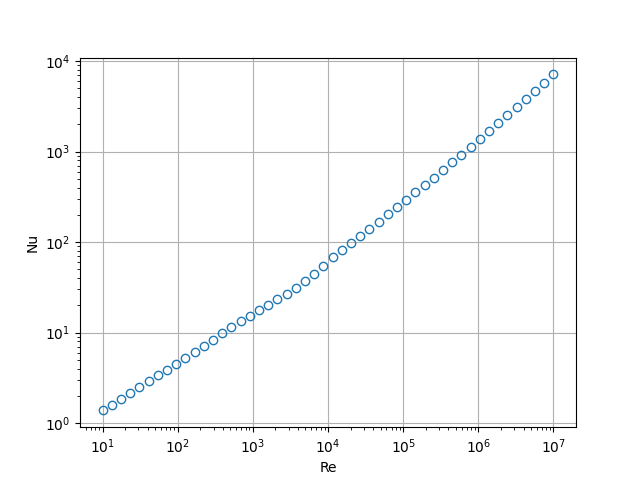

In [136]:
fig,ax = plt.subplots()
ax.loglog(Re,Nu,'o',fillstyle='none')
ax.set_ylabel('Nu')
ax.set_xlabel('Re')
ax.grid()

In [137]:
Re = 10**np.linspace(1,7,50)
Pr = 10**np.linspace(-4,2,10)
RE,PR = np.meshgrid(Re,Pr)
Nu = np.zeros_like(RE)
for i,Re_i in enumerate(Re):
    for j, Pr_j in enumerate(Pr):
        Nu[j,i] = ht.conv_external.Nu_external_cylinder(Re_i,Pr_j)

<IPython.core.display.Javascript object>


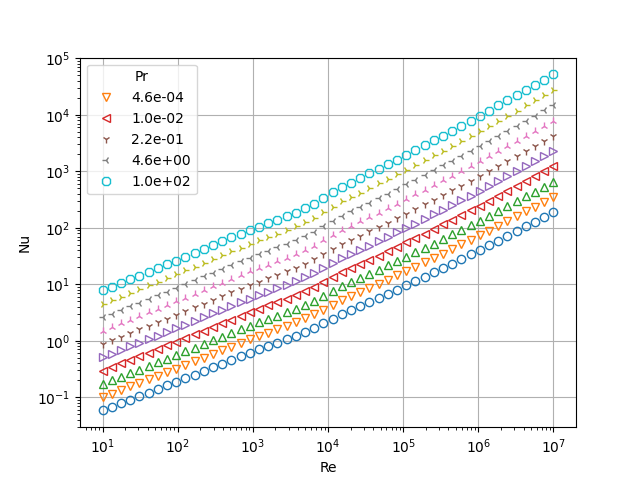

In [141]:
fig,ax = plt.subplots()

for j, Pr_j in enumerate(Pr):        
    if j/2 != int(j/2):
        ax.loglog(Re,Nu[j],label=f'{Pr_j:.1e}',marker=mk[j],fillstyle='none',linestyle='')
    else:
        ax.loglog(Re,Nu[j],marker=mk[j],fillstyle='none',linestyle='')
ax.set_ylabel('Nu')
ax.set_xlabel('Re')
ax.grid()
ax.legend(title='Pr')


In [142]:
help(ht.conv_external.Nu_cylinder_Zukauskas)

Help on function Nu_cylinder_Zukauskas in module ht.conv_external:

Nu_cylinder_Zukauskas(Re, Pr, Prw=None)
    Calculates Nusselt number for crossflow across a single tube at a
    specified Re. Method from [1]_, also shown without modification in [2]_.
    This method applies to both the laminar and turbulent regimes.
    
    .. math::
        Nu_{D}=CRe^{m}Pr^{n}\left(\frac{Pr}{Pr_s}\right)^{1/4}
    
    Parameters
    ----------
    Re : float
        Reynolds number with respect to cylinder diameter, [-]
    Pr : float
        Prandtl number at free stream temperature [-]
    Prw : float, optional
        Prandtl number at wall temperature, [-]
    
    Returns
    -------
    Nu : float
        Nusselt number with respect to cylinder diameter, [-]
    
    Notes
    -----
    If Prandtl number at wall are not provided, the Prandtl number correction
    is not used and left to an outside function.
    
    n is 0.37 if Pr <= 10; otherwise n is 0.36.
    
    C and m are from the

In [144]:
help(ht.conv_tube_bank.Nu_Zukauskas_Bejan)

Help on function Nu_Zukauskas_Bejan in module ht.conv_tube_bank:

Nu_Zukauskas_Bejan(Re, Pr, tube_rows, pitch_parallel, pitch_normal, Pr_wall=None)
    Calculates Nusselt number for crossflow across a tube bank
    of tube number n at a specified `Re` according to the method of Zukauskas
    [1]_. A fit to graphs from [1]_ published in [2]_ is used for the
    correlation. The tube row correction factor is obtained from digitized
    graphs from [1]_, and a lookup table was created and is used for speed.
    
    The formulas are as follows:
    
    Aligned tube banks:
    
    .. math::
        \bar Nu_D = 0.9 C_nRe_D^{0.4}Pr^{0.36}\left(\frac{Pr}{Pr_w}\right)^{0.25}
        \text{ for } 1 < Re < 100
    
    .. math::
        \bar Nu_D = 0.52 C_nRe_D^{0.5}Pr^{0.36}\left(\frac{Pr}{Pr_w}\right)^{0.25}
        \text{ for } 100 < Re < 1000
    
    .. math::
        \bar Nu_D = 0.27 C_nRe_D^{0.63}Pr^{0.36}\left(\frac{Pr}{Pr_w}\right)^{0.25}
        \text{ for } 1000 < Re < 20000
    
  

In [146]:
ht.conv_tube_bank.Nu_Zukauskas_Bejan(Re=1E4, Pr=7., tube_rows=10, pitch_parallel=.05, pitch_normal=.05)

175.9202277145248